# ML Model to predict the AWS Product Category

## Import the necessary libraries

In [0]:
import string
import re
import nltk
import pandas as pd
import csv

from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('names')
from nltk.corpus import stopwords
from nltk.corpus import names
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.set_option('display.max_colwidth', 150)

## (A) Read the CSV file

In [0]:
df = pd.read_csv('drive/My Drive/input/cleanv4.csv')
df['description'] = df['description'].apply(lambda x: " ".join(x for x in str(x).split()))
df.head(10)

,id,label,description
0,87485.0,Amazon EC2,"['strange', 'slow', 'speed', 'via', 'http', 'many', 'instances', 'basically', 'perform', 'similar', 'fashion', 'think', 'got', 'decent', 'speed', ..."
1,87485.0,Amazon EC2,"['mrnch', 'wondering', 'ebs', 'volume', 'actually', 'bottleneck', 'm3.xlarge', 'instance', 'type', 'ebs', 'optimized', 'default', 'supports', 'ebs..."
2,87485.0,Amazon EC2,"['insight', 'happens', 'iperf', 'basically', 'need', 'load', 'file', 'furthermore', 'access', 'file', 'another', 'instance', 'within', 'region', '..."
3,87484.0,Amazon EC2,"['status', 'check', 'fail', 'every', 'day', 'created', 'linux', 'instance', 'installed', 'wordpress', 'taking', 'help', 'wordpress', 'installing',..."
4,87484.0,Amazon EC2,"['anyone', 'look', 'issue', 'suggest', 'fix', 'issue', 'raj']"
5,87483.0,Amazon EC2,"['ebs', 'modify', 'volume', 'type', 'magnetic', 'previous', 'generation', 'gp2', 'done', 'volume', 'type', 'modifications', 'magnetic', 'gp2', 'wi..."
6,87483.0,Amazon EC2,"['glad', 'see', 'successfully', 'migrate', 'magnetic', 'previous', 'generation', 'volume', 'type', 'gp2', 'latest', 'generation', 'one', 'volumes'..."
7,87482.0,Amazon EC2,"['default', 'dns', 'server', 'match', 'cidr', 'cidr', '10.170.112.0', 'create', 'instance', 'default', 'dhcp', 'options', 'default', 'dns', 'serve..."
8,87482.0,Amazon EC2,"['ihor', 'based', 'cidr', 'provided', 'internal', 'dns', '10.170.112.2', 'attempt', 'dns', 'query', 'address', 'let', 'works', 'michael']"
9,87482.0,Amazon EC2,"['michael', 'yes', '10.170.112.2', 'works', 'configured', 'automatically', 'default', 'ihor']"


#### About the uncleaned data

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461130 entries, 0 to 461129
Data columns (total 3 columns):
id             461128 non-null float64
label          461130 non-null object
description    461130 non-null object
dtypes: float64(1), object(2)
memory usage: 10.6+ MB


In [0]:
df['label'].describe()

count         461130
unique             8
top       Amazon EC2
freq          293285
Name: label, dtype: object

#### Check the spread of across labels

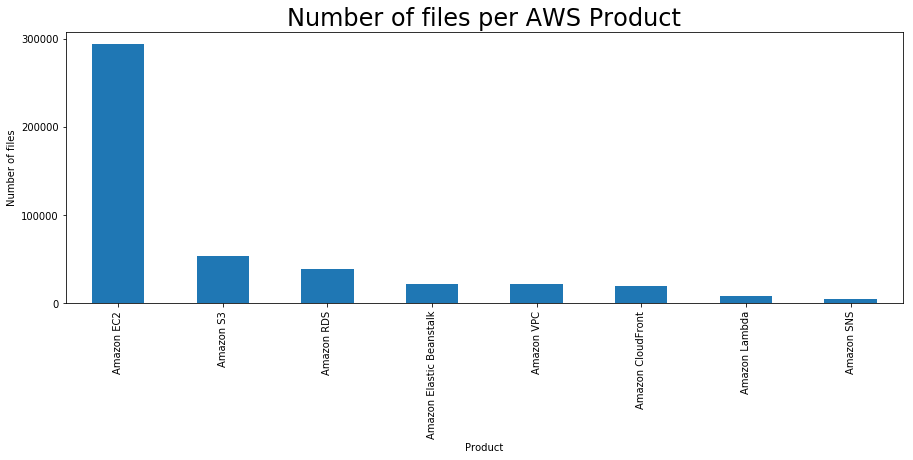

In [0]:
plt.figure(figsize=(15,5))
df.label.value_counts().plot(kind='bar');

plt.rcParams.update({'font.size': 20})
plt.title("Number of files per AWS Product")
plt.xlabel("Product")
plt.ylabel("Number of files")
plt.savefig('foo.png', bbox_inches='tight', dpi=100)

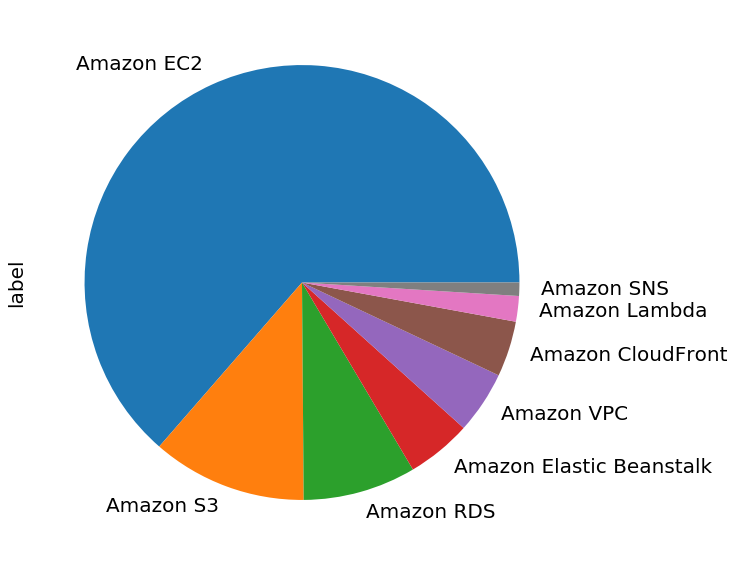

In [0]:
plt.figure(figsize=(10,10))
df.label.value_counts().plot(kind='pie');

#### Check out one sample post:

In [0]:
df['description'][10]

"['unable', 'migrate', 'r3.large', 'r5.large', 'instance', 'help', 'need', 'upgrade', 'current', 'r3.large', 'instance', 'current', 'generation', 'r5.large', 'instance', 'directly', 'however', 'try', 'launch', 'instance', 'offering', 'option', 'upgrade', 'older', 'generation', 'r4.large', 'also', 'tried', 'migrate', 'r4.large', 'instance', 'first', 'hope', 'offered', 'option', 'migrate', 'r5.large', 'however', 'r5.large', 'offered', 'upgrade', 'r4.large', 'either', 'anyone', 'let', 'need', 'advance', 'running', 'windows', 'server', 'r2', 'sql', 'server', 'standard']"

#### Top 30 words w/ frequency

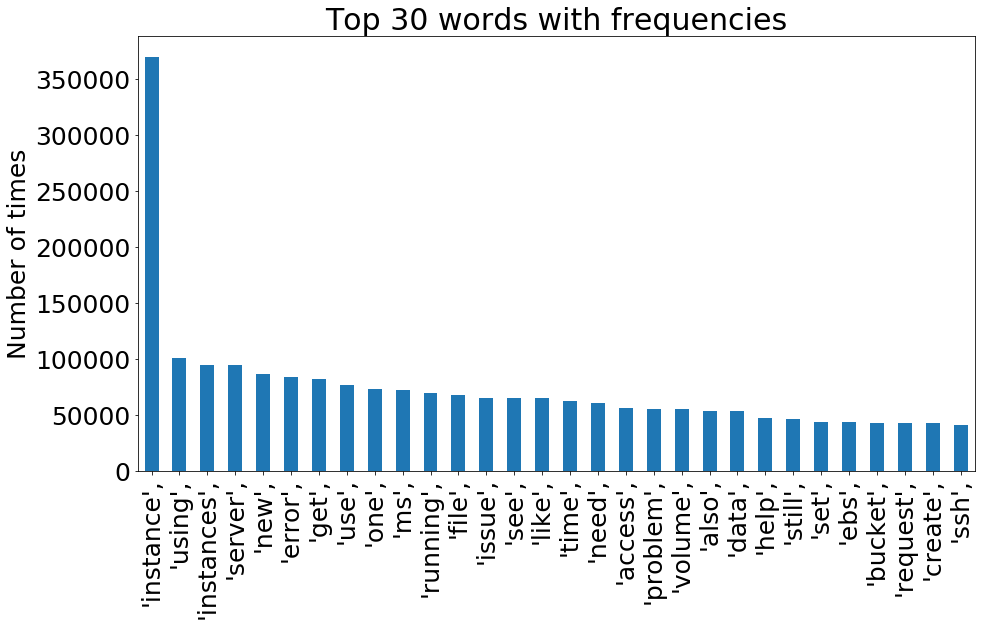

In [0]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:30]

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(15,8))

plt.title("Top 30 words with frequencies")
plt.ylabel("Number of times")

freq.plot(kind="bar")

In [0]:
print("There are totally", df['description'].apply(lambda x: len(x.split(' '))).sum(), "words.")

There are totally 18374768 words.


## (B) Feature Engineering + Model Deployment

In [0]:
from sklearn.model_selection import train_test_split

X = df['description']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Logistic Regression Model

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', TfidfVectorizer(ngram_range = (1,2), stop_words = "english")), ('clf', LogisticRegression(n_jobs = 1))])

logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sca

In [0]:
y_predict_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test,y_predict_logreg))

[[ 3094  1726    17    22    29   823     1     4]
 [  119 84864   408    50   666  1037    34   647]
 [   18  2798  3625    31   102   141     7    39]
 [   42   951    87  1348    47   188    13    27]
 [    8  4189    45    22  7250    77     5    61]
 [  281  4805    52    54    76 10640    10    18]
 [    2   509    11    16     9    89   724     2]
 [    4  2864    21    11    72    50     3  3354]]


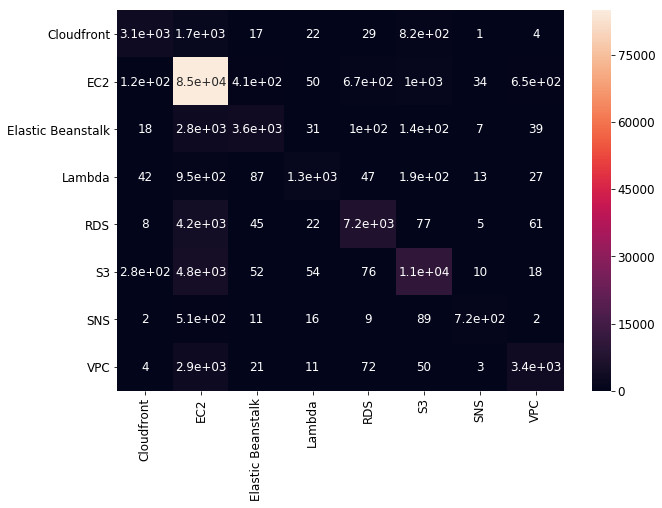

In [0]:
array = confusion_matrix(y_test, y_predict_logreg)
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

plt.rcParams.update({'font.size': 12})
df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test, y_predict_logreg))
print('accuracy:', accuracy_score(y_predict_logreg, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.87      0.54      0.67      5716
              Amazon EC2       0.83      0.97      0.89     87825
Amazon Elastic Beanstalk       0.85      0.54      0.66      6761
           Amazon Lambda       0.87      0.50      0.63      2703
              Amazon RDS       0.88      0.62      0.73     11657
               Amazon S3       0.82      0.67      0.73     15936
              Amazon SNS       0.91      0.53      0.67      1362
              Amazon VPC       0.81      0.53      0.64      6379

                accuracy                           0.83    138339
               macro avg       0.85      0.61      0.70    138339
            weighted avg       0.83      0.83      0.82    138339

accuracy: 0.8305611577357073


#### Cross validating the test and train scores

In [0]:
y_train_predict_logreg = logreg.predict(X_train)

print(confusion_matrix(y_train,y_train_predict_logreg))

[[  7716   4078     24     35     30   1438      0      7]
 [   149 201919    447     40    827   1219     33    826]
 [    26   6045   8853     25    200    203     14     68]
 [    54   2183     93   3285     67    300     18     53]
 [     6   8663     58     27  18098    104      8    107]
 [   378   9596     52     66     86  26986      7     24]
 [     3   1253     23     36     22    137   1728      1]
 [     1   6491     36     19    122     60      4   8314]]


In [0]:
print(classification_report(y_train, y_train_predict_logreg))
print('accuracy:', accuracy_score(y_train_predict_logreg, y_train))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.93      0.58      0.71     13328
              Amazon EC2       0.84      0.98      0.91    205460
Amazon Elastic Beanstalk       0.92      0.57      0.71     15434
           Amazon Lambda       0.93      0.54      0.69      6053
              Amazon RDS       0.93      0.67      0.78     27071
               Amazon S3       0.89      0.73      0.80     37195
              Amazon SNS       0.95      0.54      0.69      3203
              Amazon VPC       0.88      0.55      0.68     15047

                accuracy                           0.86    322791
               macro avg       0.91      0.65      0.74    322791
            weighted avg       0.87      0.86      0.85    322791

accuracy: 0.8578275106802854


The accuracy of the model on test data is 83.2% and 85.7% on the train data. We can conclude that the model is not overfitted

### SVM Model

In [0]:
from sklearn.svm import LinearSVC

svm = Pipeline([('vect', TfidfVectorizer(stop_words = "english")), ('clf', LinearSVC())])

svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
           

In [0]:
y_predict_svm = svm.predict(X_test)
print(confusion_matrix(y_test, y_predict_svm))

[[ 3420  1413    22    35    41   772     5     8]
 [  192 84188   492    96   770  1323    53   711]
 [   36  2251  4129    37   121   133    12    42]
 [   44   717    75  1621    56   140    19    31]
 [   19  3384    82    28  7957   103     9    75]
 [  399  4278    75    66   104 10958    34    22]
 [    5   352    12    27    15    66   882     3]
 [    8  2593    39    14    98    54     5  3568]]


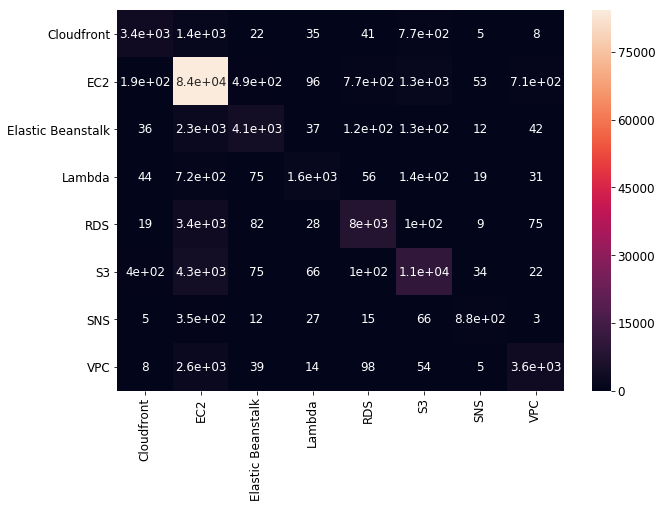

In [0]:
array = confusion_matrix(y_test, y_predict_svm)
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test, y_predict_svm))
print('accuracy:', accuracy_score(y_predict_svm, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.83      0.60      0.70      5716
              Amazon EC2       0.85      0.96      0.90     87825
Amazon Elastic Beanstalk       0.84      0.61      0.71      6761
           Amazon Lambda       0.84      0.60      0.70      2703
              Amazon RDS       0.87      0.68      0.76     11657
               Amazon S3       0.81      0.69      0.74     15936
              Amazon SNS       0.87      0.65      0.74      1362
              Amazon VPC       0.80      0.56      0.66      6379

                accuracy                           0.84    138339
               macro avg       0.84      0.67      0.74    138339
            weighted avg       0.84      0.84      0.84    138339

accuracy: 0.8437461597958638


#### Cross validating the test and train scores

In [0]:
y_train_predict_svm = svm.predict(X_train)

print(confusion_matrix(y_train,y_train_predict_svm))

[[  9994   2225     16     29     44   1005      6      9]
 [   225 201140    591     78    951   1470     63    942]
 [    26   3762  11239     32    168    124     16     67]
 [    38    988     66   4698     62    146     16     39]
 [    12   6106     93     21  20588    118     21    112]
 [   401   6302     77     70    128  30166     21     30]
 [     6    515     13     31     20     52   2565      1]
 [     5   4763     47     17    112     58      7  10038]]


In [0]:
print(classification_report(y_train, y_train_predict_svm))
print('accuracy:', accuracy_score(y_train_predict_svm, y_train))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.93      0.75      0.83     13328
              Amazon EC2       0.89      0.98      0.93    205460
Amazon Elastic Beanstalk       0.93      0.73      0.82     15434
           Amazon Lambda       0.94      0.78      0.85      6053
              Amazon RDS       0.93      0.76      0.84     27071
               Amazon S3       0.91      0.81      0.86     37195
              Amazon SNS       0.94      0.80      0.87      3203
              Amazon VPC       0.89      0.67      0.76     15047

                accuracy                           0.90    322791
               macro avg       0.92      0.78      0.84    322791
            weighted avg       0.90      0.90      0.90    322791

accuracy: 0.8997400794941619


**Clearly, the SVM model is being overfitted. While test accuracy is 85.5%, the train accuracy is nearly 99%.**

### Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([('vect', TfidfVectorizer(stop_words = "english")), ('rfc',RandomForestClassifier())])

rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [0]:
y_predict_rf = rf.predict(X_test)

print(confusion_matrix(y_test,y_predict_rf))

[[ 2563  2264    18    15    17   831     2     6]
 [  226 85253   227    56   499  1109    23   432]
 [   49  4517  1912    25    76   155     6    21]
 [   65  1527    65   699    45   261    12    29]
 [   20  5188    28     9  6300    77     4    31]
 [  426  6926    47    39   101  8372     8    17]
 [   16   797    11    22    19    91   402     4]
 [   13  3767    20     8    51    52     4  2464]]


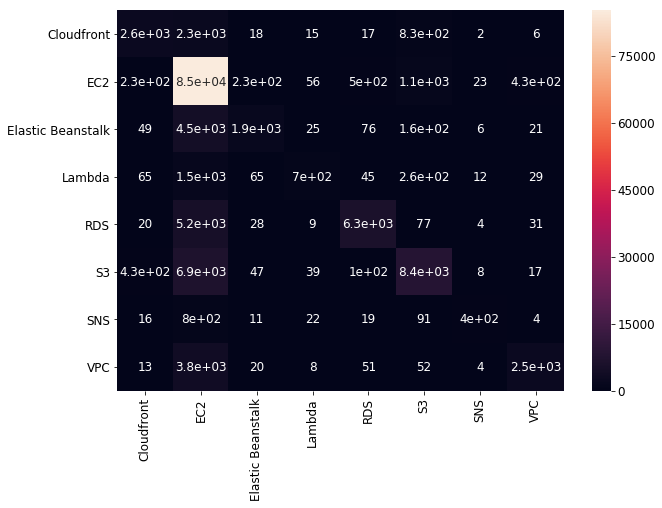

In [0]:
array = confusion_matrix(y_test, y_predict_rf)
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

plt.rcParams.update({'font.size': 12})
df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test, y_predict_rf))
print('accuracy:', accuracy_score(y_predict_rf, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.76      0.45      0.56      5716
              Amazon EC2       0.77      0.97      0.86     87825
Amazon Elastic Beanstalk       0.82      0.28      0.42      6761
           Amazon Lambda       0.80      0.26      0.39      2703
              Amazon RDS       0.89      0.54      0.67     11657
               Amazon S3       0.76      0.53      0.62     15936
              Amazon SNS       0.87      0.30      0.44      1362
              Amazon VPC       0.82      0.39      0.53      6379

                accuracy                           0.78    138339
               macro avg       0.81      0.46      0.56    138339
            weighted avg       0.79      0.78      0.75    138339

accuracy: 0.7804379097723708


#### Cross validating the test and train scores

In [0]:
y_train_predict_rf = rf.predict(X_train)

print(confusion_matrix(y_train,y_train_predict_rf))

[[ 12851    406      8      3      6     46      1      7]
 [    25 205165     26     10     96     93      4     41]
 [     5    992  14401      1     15     12      3      5]
 [     3    310      9   5711      6      9      1      4]
 [     4   1228     13      3  25800     13      0     10]
 [    28   1441     13      9     26  35671      2      5]
 [     0    152      3      0      6     16   3026      0]
 [     3   1084     10      2     12     13      1  13922]]


In [0]:
print(classification_report(y_train, y_train_predict_rf))
print('accuracy:', accuracy_score(y_train_predict_rf, y_train))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.99      0.96      0.98     13328
              Amazon EC2       0.97      1.00      0.99    205460
Amazon Elastic Beanstalk       0.99      0.93      0.96     15434
           Amazon Lambda       1.00      0.94      0.97      6053
              Amazon RDS       0.99      0.95      0.97     27071
               Amazon S3       0.99      0.96      0.98     37195
              Amazon SNS       1.00      0.94      0.97      3203
              Amazon VPC       0.99      0.93      0.96     15047

                accuracy                           0.98    322791
               macro avg       0.99      0.95      0.97    322791
            weighted avg       0.98      0.98      0.98    322791

accuracy: 0.9806562140827966


### XGBoost Model

In [0]:
from xgboost import XGBClassifier

xgb = Pipeline([('vect', TfidfVectorizer(stop_words = "english")), ('clf', XGBClassifier())])

xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                        

In [0]:
y_predict_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test,y_predict_xgb))

[[ 2456  2689     3    21     8   524     0    15]
 [   98 85379   333    74   702   599     9   631]
 [   14  3860  2622    16   100    98     1    50]
 [   36  1334    47  1118    32   106     9    21]
 [    3  6364    44    43  5104    45     1    53]
 [  208  8218    46    72    60  7307     5    20]
 [    2   776     9    19    10    15   527     4]
 [    3  3354    22    10    50    15     2  2923]]


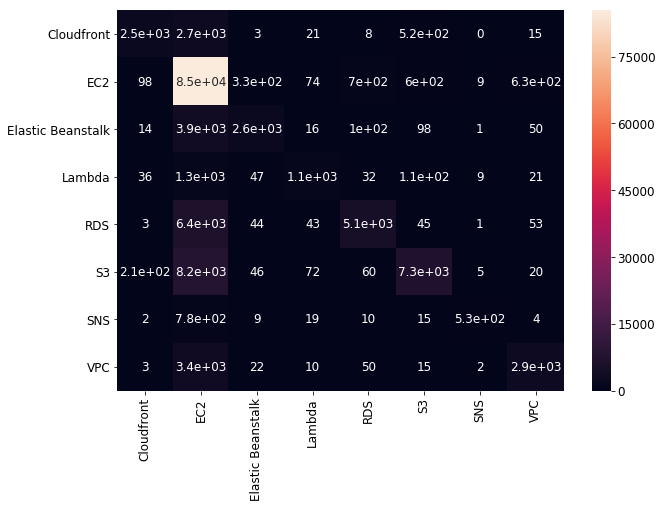

In [0]:
array = confusion_matrix(y_test, y_predict_xgb)
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

plt.rcParams.update({'font.size': 12})
df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test, y_predict_xgb))
print('accuracy:', accuracy_score(y_predict_xgb, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.87      0.43      0.58      5716
              Amazon EC2       0.76      0.97      0.85     87825
Amazon Elastic Beanstalk       0.84      0.39      0.53      6761
           Amazon Lambda       0.81      0.41      0.55      2703
              Amazon RDS       0.84      0.44      0.58     11657
               Amazon S3       0.84      0.46      0.59     15936
              Amazon SNS       0.95      0.39      0.55      1362
              Amazon VPC       0.79      0.46      0.58      6379

                accuracy                           0.78    138339
               macro avg       0.84      0.49      0.60    138339
            weighted avg       0.79      0.78      0.75    138339

accuracy: 0.7766139700301433


#### Cross validating the test and train scores

In [0]:
y_train_predict_xgb = rf.predict(X_train)

print(confusion_matrix(y_train,y_train_predict_xgb))

[[ 12851    406      8      3      6     46      1      7]
 [    25 205165     26     10     96     93      4     41]
 [     5    992  14401      1     15     12      3      5]
 [     3    310      9   5711      6      9      1      4]
 [     4   1228     13      3  25800     13      0     10]
 [    28   1441     13      9     26  35671      2      5]
 [     0    152      3      0      6     16   3026      0]
 [     3   1084     10      2     12     13      1  13922]]


In [0]:
print(classification_report(y_train, y_train_predict_xgb))
print('accuracy:', accuracy_score(y_train_predict_xgb, y_train))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.99      0.96      0.98     13328
              Amazon EC2       0.97      1.00      0.99    205460
Amazon Elastic Beanstalk       0.99      0.93      0.96     15434
           Amazon Lambda       1.00      0.94      0.97      6053
              Amazon RDS       0.99      0.95      0.97     27071
               Amazon S3       0.99      0.96      0.98     37195
              Amazon SNS       1.00      0.94      0.97      3203
              Amazon VPC       0.99      0.93      0.96     15047

                accuracy                           0.98    322791
               macro avg       0.99      0.95      0.97    322791
            weighted avg       0.98      0.98      0.98    322791

accuracy: 0.9806562140827966


### Naive Bayes Model

In [0]:
from sklearn.naive_bayes import MultinomialNB

nb = Pipeline([('vect', TfidfVectorizer(stop_words = "english")), ('clf', MultinomialNB())])

nb.fit(X_train, y_train)

In [0]:
y_predict_nb = nb.predict(X_test)

print(confusion_matrix(y_test,y_predict_nb))

[[ 2563  2264    18    15    17   831     2     6]
 [  226 85253   227    56   499  1109    23   432]
 [   49  4517  1912    25    76   155     6    21]
 [   65  1527    65   699    45   261    12    29]
 [   20  5188    28     9  6300    77     4    31]
 [  426  6926    47    39   101  8372     8    17]
 [   16   797    11    22    19    91   402     4]
 [   13  3767    20     8    51    52     4  2464]]


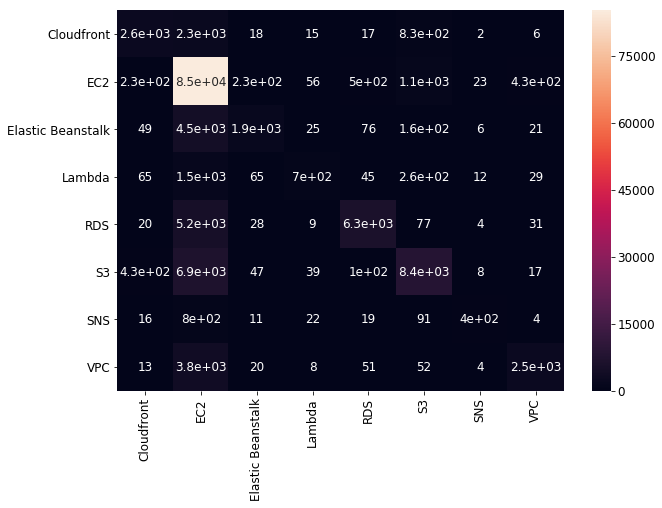

In [0]:
array = confusion_matrix(y_test, y_predict_nb)
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

plt.rcParams.update({'font.size': 12})
df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test, y_predict_nb))
print('accuracy:', accuracy_score(y_predict_nb, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.76      0.45      0.56      5716
              Amazon EC2       0.77      0.97      0.86     87825
Amazon Elastic Beanstalk       0.82      0.28      0.42      6761
           Amazon Lambda       0.80      0.26      0.39      2703
              Amazon RDS       0.89      0.54      0.67     11657
               Amazon S3       0.76      0.53      0.62     15936
              Amazon SNS       0.87      0.30      0.44      1362
              Amazon VPC       0.82      0.39      0.53      6379

                accuracy                           0.78    138339
               macro avg       0.81      0.46      0.56    138339
            weighted avg       0.79      0.78      0.75    138339

accuracy: 0.7804379097723708


#### Cross validating the test and train scores

In [0]:
y_train_predict_nb = nb.predict(X_train)

print(confusion_matrix(y_train,y_train_predict_nb))

[[ 12851    406      8      3      6     46      1      7]
 [    25 205165     26     10     96     93      4     41]
 [     5    992  14401      1     15     12      3      5]
 [     3    310      9   5711      6      9      1      4]
 [     4   1228     13      3  25800     13      0     10]
 [    28   1441     13      9     26  35671      2      5]
 [     0    152      3      0      6     16   3026      0]
 [     3   1084     10      2     12     13      1  13922]]


In [0]:
print(classification_report(y_train, y_train_predict_nb))
print('accuracy:', accuracy_score(y_train_predict_nb, y_train))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.99      0.96      0.98     13328
              Amazon EC2       0.97      1.00      0.99    205460
Amazon Elastic Beanstalk       0.99      0.93      0.96     15434
           Amazon Lambda       1.00      0.94      0.97      6053
              Amazon RDS       0.99      0.95      0.97     27071
               Amazon S3       0.99      0.96      0.98     37195
              Amazon SNS       1.00      0.94      0.97      3203
              Amazon VPC       0.99      0.93      0.96     15047

                accuracy                           0.98    322791
               macro avg       0.99      0.95      0.97    322791
            weighted avg       0.98      0.98      0.98    322791

accuracy: 0.9806562140827966


## (C) Cross Validation, Hyper Parameter Tuning

### Parameter tuning for SVM

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1,1), (1,2), (1,3)]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__use_idf': [True, False]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'clf__max_iter':  [100, 1000, 10000]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

## (D) Save Model to .pkl file

In [0]:
import pickle
filename = 'drive/My Drive/Colab Notebooks/saved-models/logreg_model.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [0]:
filename = 'drive/My Drive/Colab Notebooks/saved-models/svm_model.pkl'
pickle.dump(svm, open(filename, 'wb'))